# **Unsupervised Learning: Clustering**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import files
uploaded = files.upload()

Saving mall.xlsx to mall.xlsx


In [10]:
df=pd.read_excel('mall.xlsx')

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.shape

(200, 5)

In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [20]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [23]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)

In [24]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [28]:
df.nunique()

,0
Gender,2
Age,51
Income,64
Score,84


# Visualization

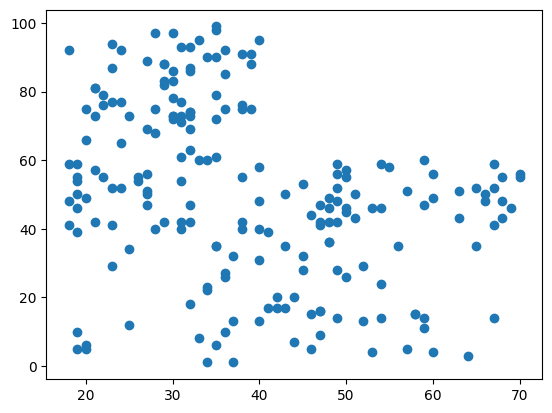

In [29]:
plt.scatter(df.Age,df.Score)

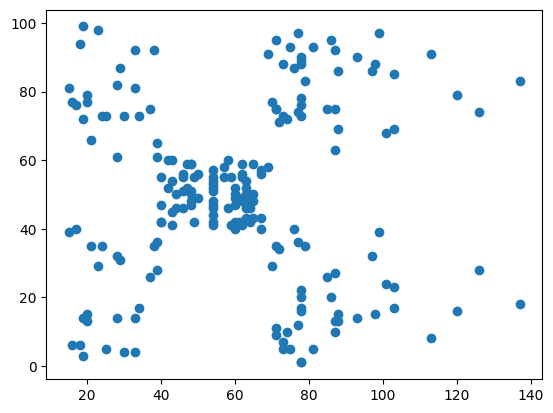

In [30]:
plt.scatter(df.Income,df.Score)

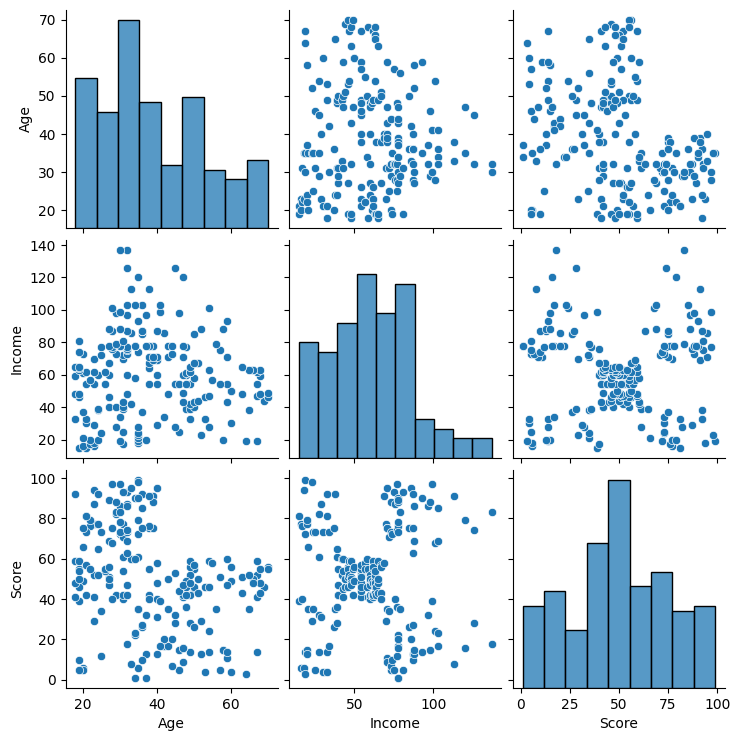

In [34]:
sns.pairplot(df[['Age','Income','Score']])#pairplot => can show scatterplot(onno kono column asle) and histblot(nije der sapekhe)


# Perform K-Means Cluster

In [35]:
import sklearn.cluster as cluster

In [36]:
kmeans=cluster.KMeans()

In [64]:
#default value of n_clusters is 8

In [38]:
pred=kmeans.fit_predict(df[['Income','Score']])

In [39]:
pred

array([7, 3, 4, 3, 7, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 7, 3, 7, 3, 7, 3,
       4, 3, 4, 3, 7, 3, 7, 3, 4, 3, 4, 3, 4, 3, 4, 3, 7, 3, 7, 3, 7, 0,
       7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 1, 5, 1, 2, 1, 2, 1,
       5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 5, 1, 2, 1, 5, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 6, 1, 6, 1, 6, 1,
       6, 1], dtype=int32)

In [40]:
df2=df.copy()

In [41]:
df2.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [42]:
df2['predicted']=pred

In [43]:
df2.head()

,Gender,Age,Income,Score,predicted
0,Male,19,15,39,7
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,7


In [44]:
#initial center find out
centers=kmeans.cluster_centers_
centers

array([[ 47.86046512,  51.97674419],
       [ 86.53846154,  82.12820513],
       [ 84.46428571,  15.32142857],
       [ 25.0952381 ,  80.04761905],
       [ 24.58333333,   9.58333333],
       [ 63.95238095,  46.21428571],
       [124.        ,  17.5       ],
       [ 28.18181818,  33.27272727]])

In [53]:
df0=df2[df2.predicted==0]
df1=df2[df2.predicted==1]
df3=df2[df2.predicted==2]
df4=df2[df2.predicted==3]
df5=df2[df2.predicted==4]
df6=df2[df2.predicted==5]
df7=df2[df2.predicted==6]
df8=df2[df2.predicted==7]
df9=df2[df2.predicted==8]


In [55]:
df0.head()

,Gender,Age,Income,Score,predicted
43,Female,31,39,61,0
45,Female,24,39,65,0
46,Female,50,40,55,0
47,Female,27,40,47,0
48,Female,29,40,42,0


In [57]:
df4.head()

,Gender,Age,Income,Score,predicted
1,Male,21,15,81,3
3,Female,23,16,77,3
5,Female,22,17,76,3
7,Female,23,18,94,3
9,Female,30,19,72,3


In [59]:
df8.head()

,Gender,Age,Income,Score,predicted
0,Male,19,15,39,7
4,Female,31,17,40,7
16,Female,35,21,35,7
18,Male,52,23,29,7
20,Male,35,24,35,7


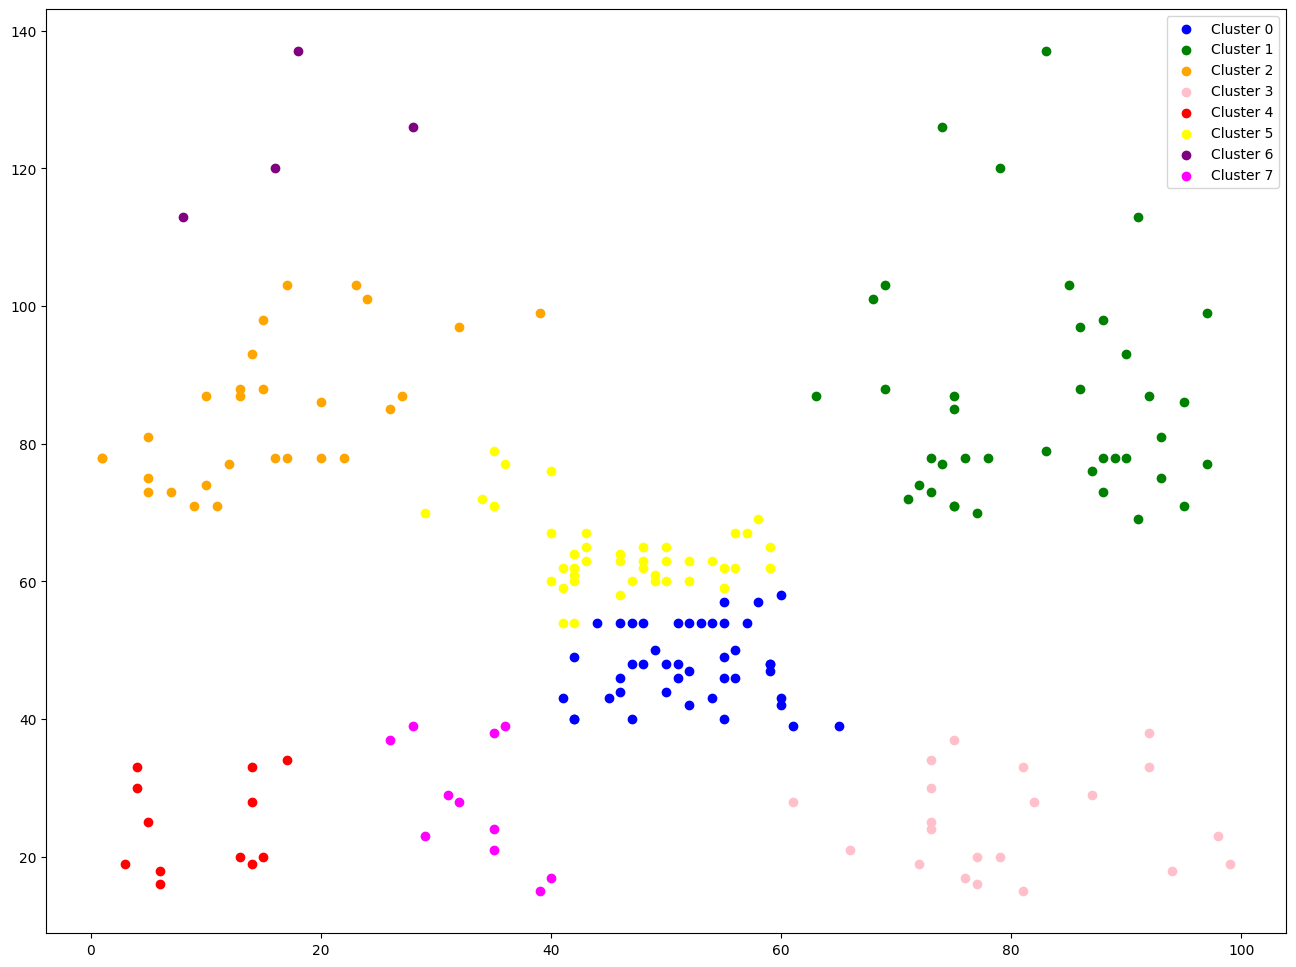

In [60]:
plt.figure(figsize=(16,12))
plt.scatter(df0['Score'], df0['Income'], color='blue', label='Cluster 0')
plt.scatter(df1['Score'], df1['Income'], color='green', label='Cluster 1')
plt.scatter(df3['Score'], df3['Income'], color='orange', label='Cluster 2')
plt.scatter(df4['Score'], df4['Income'], color='pink', label='Cluster 3')
plt.scatter(df5['Score'], df5['Income'], color='red', label='Cluster 4')
plt.scatter(df6['Score'], df6['Income'], color='yellow', label='Cluster 5')
plt.scatter(df7['Score'], df7['Income'], color='purple', label='Cluster 6')
plt.scatter(df8['Score'], df8['Income'], color='fuchsia', label='Cluster 7')

plt.legend()

# Elbow Method

In [61]:
from sklearn.cluster import KMeans

In [62]:
wcss=[]

In [63]:
cluster=range(1,15)

In [67]:
cluster = range(1,15)
for k in cluster:
  kmean = KMeans(n_clusters=k)
  kmean.fit(df[['Income','Score']])
  wcss.append(kmean.inertia_)#inertia_ => findout the error

In [68]:
wcss

[269981.28000000014,
 183714.08082173267,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 38797.9027638142,
 31925.316627655287,
 26188.91662485241,
 26230.947597654285,
 21588.874586666825,
 18324.156277577582,
 16097.845648333934,
 16720.17093806092,
 14998.952975044283]

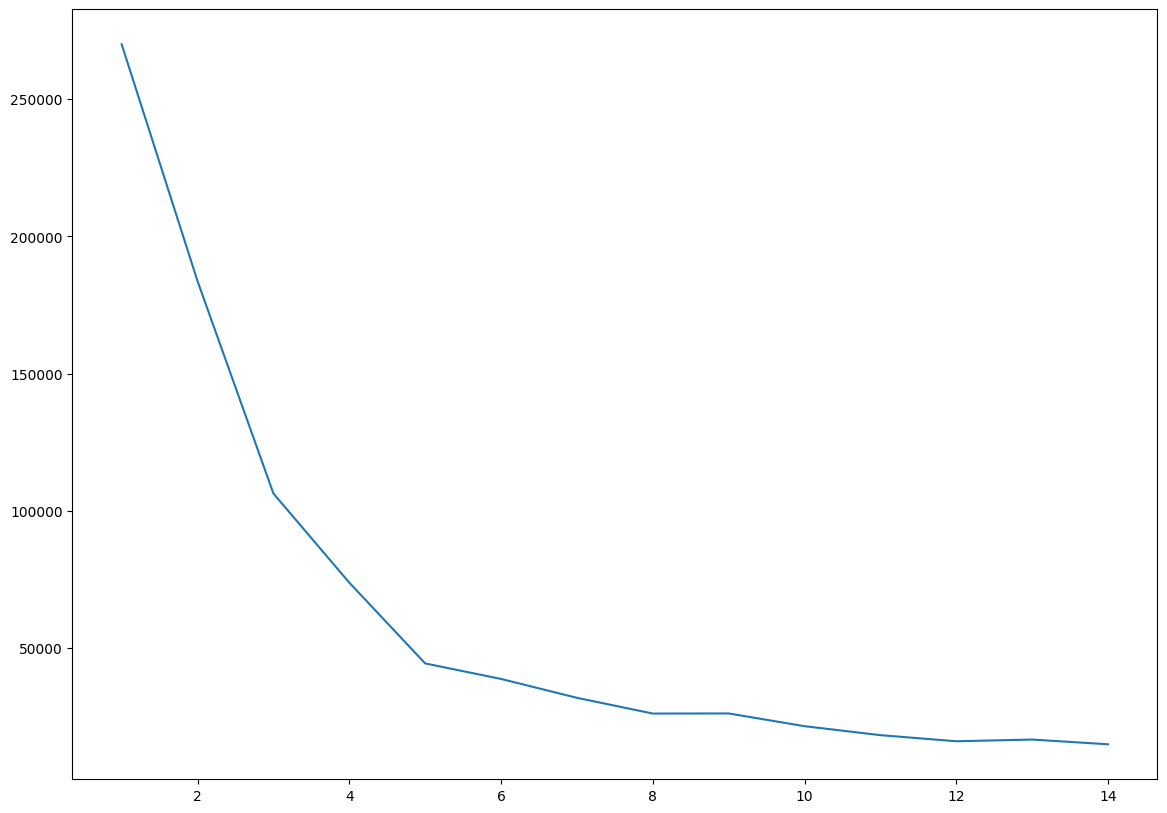

In [69]:
plt.figure(figsize=(14,10))
plt.plot(cluster,wcss)

# Find best K

In [70]:
!pip install kneed

In [71]:
from kneed import KneeLocator

In [72]:
kn=KneeLocator(cluster,wcss,curve='convex',direction='decreasing')

In [73]:
kn

In [75]:
print('optimal number of cluster is: ',kn.knee)

optimal number of cluster is:  5


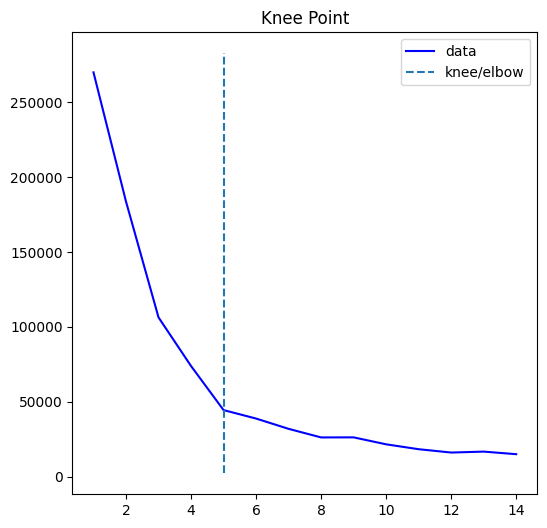

In [77]:
kn.plot_knee()

# After Select Best K

In [80]:
import sklearn.cluster as cluster

kmeans = cluster.KMeans(n_clusters=5)

In [81]:
predicted=kmeans.fit_predict(df[['Income','Score']])

In [82]:
predicted

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [83]:
df['predicted'] = predicted

In [84]:
df.head()

,Gender,Age,Income,Score,predicted
0,Male,19,15,39,2
1,Male,21,15,81,4
2,Female,20,16,6,2
3,Female,23,16,77,4
4,Female,31,17,40,2


In [86]:
center2=kmeans.cluster_centers_
center2

array([[55.0875    , 49.7125    ],
       [87.75      , 17.58333333],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

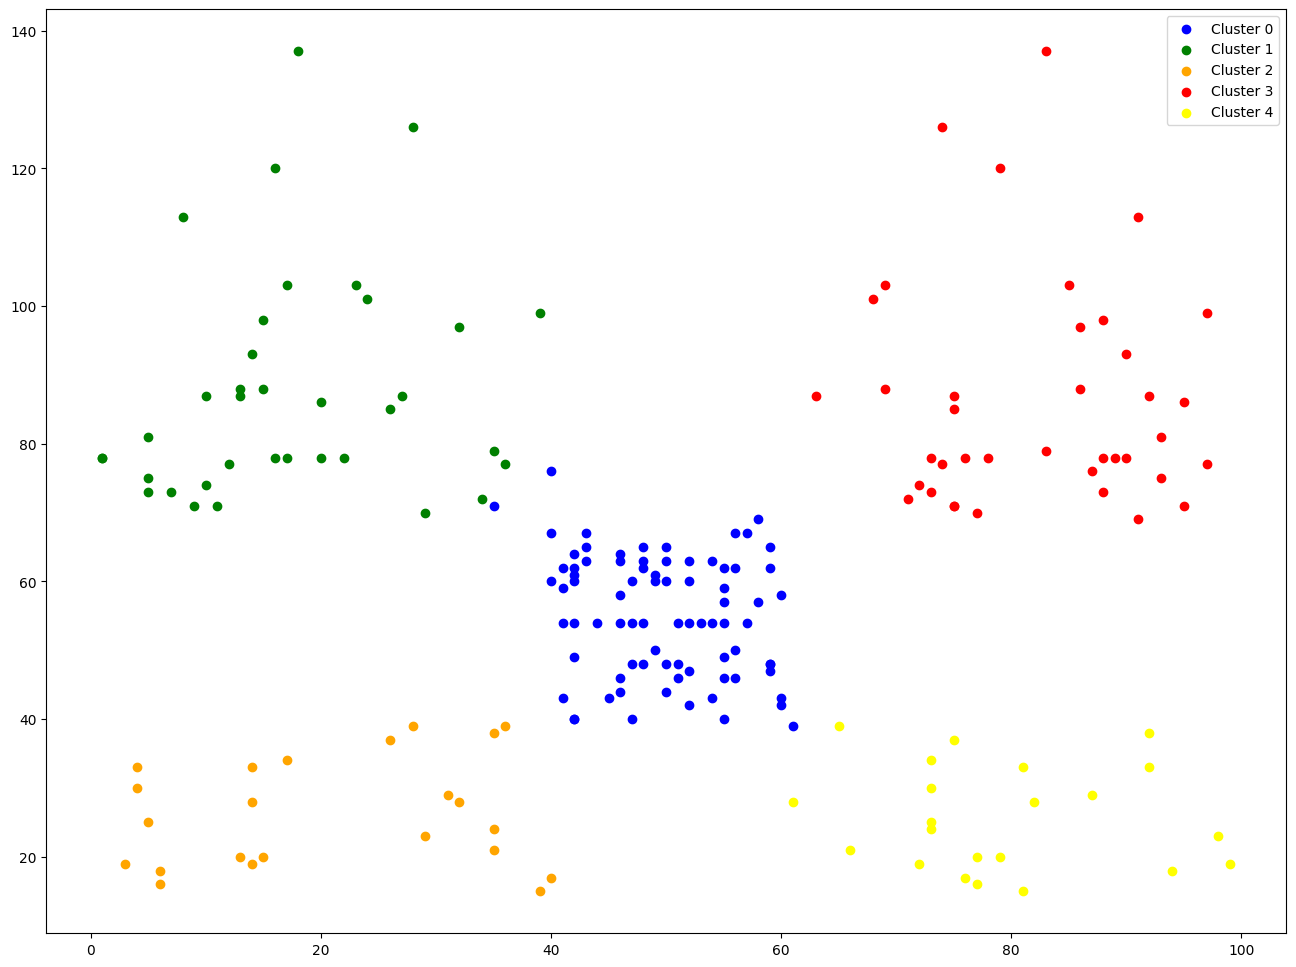

In [87]:
df0 = df[df.predicted == 0]
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]
df3 = df[df.predicted == 3]
df4 = df[df.predicted == 4]

plt.figure(figsize=(16, 12))
plt.scatter(df0['Score'], df0['Income'], color='blue', label='Cluster 0')
plt.scatter(df1['Score'], df1['Income'], color='green', label='Cluster 1')
plt.scatter(df2['Score'], df2['Income'], color='orange', label='Cluster 2')
plt.scatter(df3['Score'], df3['Income'], color='red', label='Cluster 3')
plt.scatter(df4['Score'], df4['Income'], color='yellow', label='Cluster 4')

plt.legend()